In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('blinkit_data.csv')

In [3]:
print("Shape of the DataFrame:")

print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')


Shape of the DataFrame:
Rows: 8523
Columns: 12


In [4]:
df.sample(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
1872,Low Fat,DRG13,Soft Drinks,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.037338,17.250,163.7526,4.3
1660,Low Fat,FDW50,Dairy,2017,OUT035,Tier 2,Small,Supermarket Type1,0.075564,13.100,168.1158,4.3
1600,Low Fat,FDK43,Meat,2020,OUT017,Tier 2,High,Supermarket Type1,0.026993,9.800,127.3020,4.3
3521,Regular,FDI27,Dairy,2020,OUT017,Tier 2,High,Supermarket Type1,0.000000,8.710,43.5744,4.0
7780,Low Fat,FDR26,Dairy,2000,OUT013,Tier 3,High,Supermarket Type1,0.042801,20.700,178.3028,4.0
271,Low Fat,NCI54,Household,2017,OUT035,Tier 2,Small,Supermarket Type1,0.033593,15.200,108.1912,5.0
634,Low Fat,NCE30,Household,2017,OUT035,Tier 2,Small,Supermarket Type1,0.099117,16.000,210.7902,4.6
1508,Low Fat,FDT45,Snack Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.057313,15.850,53.3956,4.3
6834,LF,FDH57,Fruits and Vegetables,2020,OUT017,Tier 2,Medium,Supermarket Type1,0.035950,10.895,132.9284,4.0
1283,Regular,FDE51,Dairy,2011,OUT010,Tier 3,Small,Grocery Store,0.161467,5.925,45.5086,4.3


In [5]:
print('\t Missing/Null value in DataSet ')
df.isnull().sum()

	 Missing/Null value in DataSet 


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
def missing_value_percentage(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return tt

In [10]:
print('\t Missing Value Percent\n')
print(missing_value_percentage(df))

	 Missing Value Percent

                           Total    Percent
Item Fat Content               0   0.000000
Item Identifier                0   0.000000
Item Type                      0   0.000000
Outlet Establishment Year      0   0.000000
Outlet Identifier              0   0.000000
Outlet Location Type           0   0.000000
Outlet Size                    0   0.000000
Outlet Type                    0   0.000000
Item Visibility                0   0.000000
Item Weight                 1463  17.165317
Sales                          0   0.000000
Rating                         0   0.000000


#**Imputing the missing values in weight**


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Item Weight']] = imputer.fit_transform(df[['Item Weight']])
print(df.isnull().sum())


Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64


In [12]:
pd.concat([pd.DataFrame(df['Item Fat Content'].unique()), pd.DataFrame(df['Item Fat Content'].value_counts().unique())], axis = 1, keys=['Unique', 'Count'])

,Unique,Count
,0,0
0,Regular,5089
1,Low Fat,2889
2,low fat,316
3,LF,117
4,reg,112


In [13]:
df = df.replace(
    {
        'LF': 'Low Fat',
        'low fat': 'Low Fat',
        'reg': 'Regular'
    }
)

In [14]:
pd.concat([
    pd.DataFrame(df['Item Fat Content'].unique()),
    pd.DataFrame(df['Item Fat Content'].value_counts().values),
    pd.DataFrame((df['Item Fat Content'].value_counts(normalize=True).values * 100).round(2))
], axis=1, keys=['Unique', 'Count', 'Percent'])


,Unique,Count,Percent
,0,0,0
0,Regular,5517,64.73
1,Low Fat,3006,35.27


In [16]:
pd.concat([pd.DataFrame(df['Outlet Type'].unique()), pd.DataFrame(df['Outlet Type'].value_counts().unique()), pd.DataFrame((df['Outlet Type'].value_counts(normalize=True).values * 100).round(2))], axis = 1, keys=['Outlet Type', 'Count','Percent'])

,Outlet Type,Count,Percent
,0,0,0
0,Supermarket Type1,5577,65.43
1,Supermarket Type2,1083,12.71
2,Grocery Store,935,10.97
3,Supermarket Type3,928,10.89


In [17]:
pd.concat([pd.DataFrame(df['Outlet Location Type'].unique()), pd.DataFrame(df['Outlet Location Type'].value_counts().unique()), pd.DataFrame((df['Outlet Location Type'].value_counts(normalize=True).values * 100).round(2))], axis = 1, keys=['Outlet Location Type', 'Count', 'Percent'])

,Outlet Location Type,Count,Percent
,0,0,0
0,Tier 1,3350,39.31
1,Tier 3,2785,32.68
2,Tier 2,2388,28.02


# Important keys


In [18]:
total_sales = round(df['Sales'].sum(),2)
avg_sales = round(df ['Sales'].mean(), 2)
no_of_items = df['Item Identifier'].nunique()
no_of_stores = df['Outlet Identifier'].nunique()
avg_rating = df['Rating'].mean()
print(f'Total Sales: {total_sales}')
print(f'Average Sales: {avg_sales}')
print(f'Number of Items: {no_of_items}')
print(f'Number of Stores: {no_of_stores}')
print(f'Average Rating: {avg_rating}')

Total Sales: 1201681.48
Average Sales: 140.99
Number of Items: 1559
Number of Stores: 10
Average Rating: 3.965857092573038


In [19]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

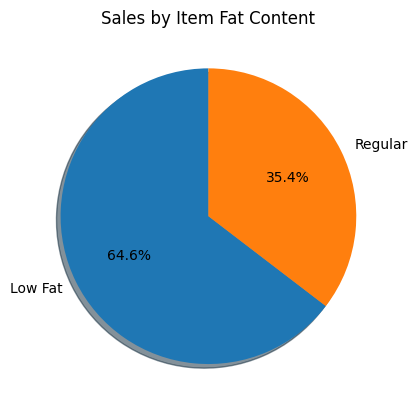

In [20]:
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Sales by Item Fat Content')
plt.show()

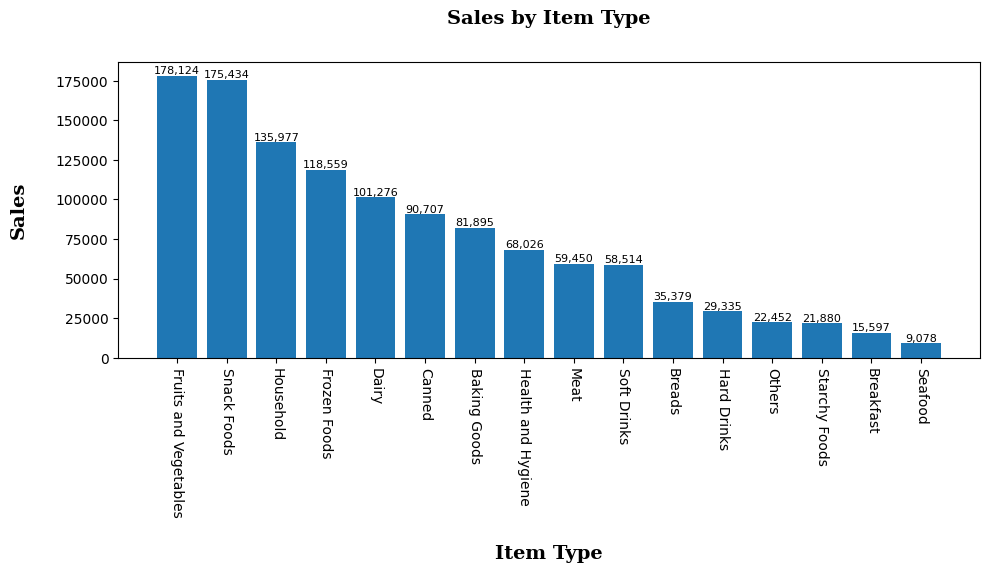

In [21]:

sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending =False)

custom_font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 14,
}

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type', labelpad = 20,fontdict=custom_font)
plt.ylabel('Sales', labelpad = 20,fontdict=custom_font)
plt.title('Sales by Item Type',y=1.1,fontdict=custom_font)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom',fontsize= 8)

plt.tight_layout()
plt.show()

🔹 .unstack()

Works on a MultiIndex (row index with multiple levels).

It moves one of the levels of the row index into columns.

Often comes after groupby() (which creates a MultiIndex when grouping by multiple columns).


🔹 .pivot()

Used explicitly when you want to reshape data based on columns.

Requires you to specify:

index → what becomes rows

columns → what becomes new columns

values → what fills the table


Why .unstack() instead of .pivot()?

If you already did a groupby and have a MultiIndex result → .unstack() is faster and more natural.

.pivot() works better on raw/tabular data before grouping.

.unstack() avoids having to rewrite pivot(index=..., columns=..., values=...).

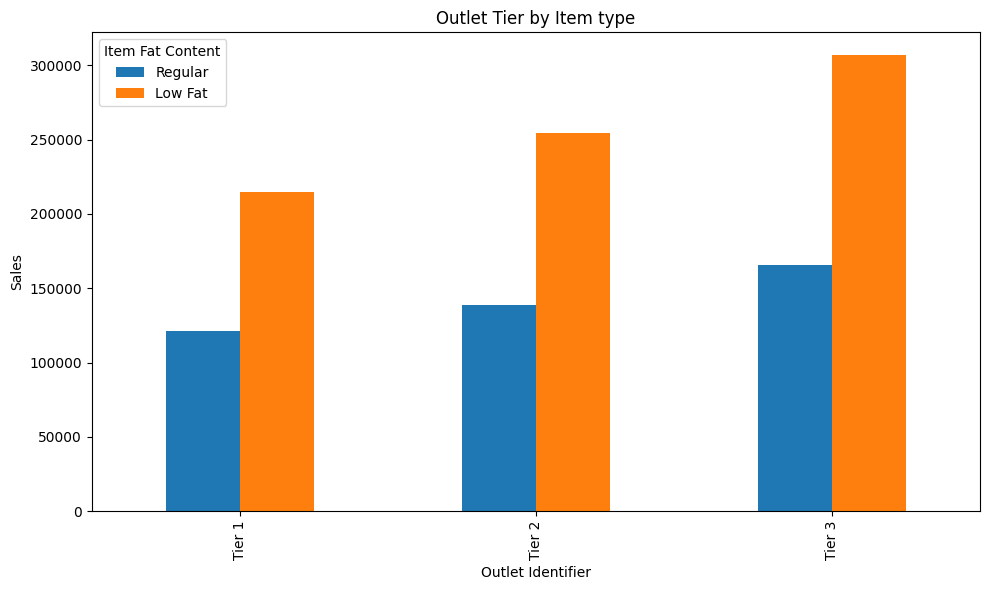

In [25]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped=  grouped[['Regular','Low Fat']]

grouped.plot(kind='bar', figsize=(10, 6), title = 'Outlet Tier by Item type' )
plt.xlabel('Outlet Identifier')
plt.ylabel('Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


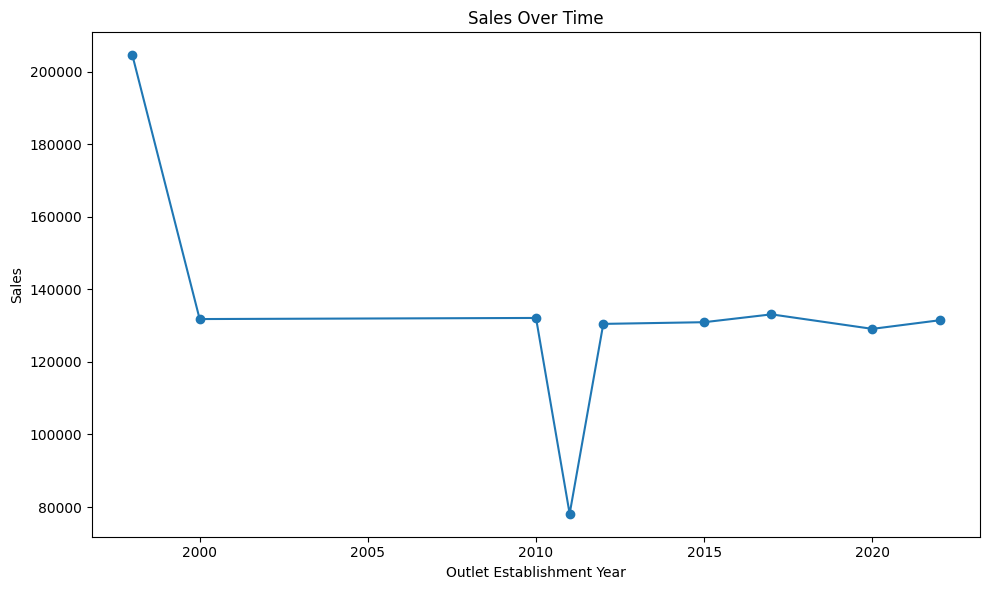

In [32]:
grouped = df.groupby(['Outlet Establishment Year'])['Sales'].sum().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

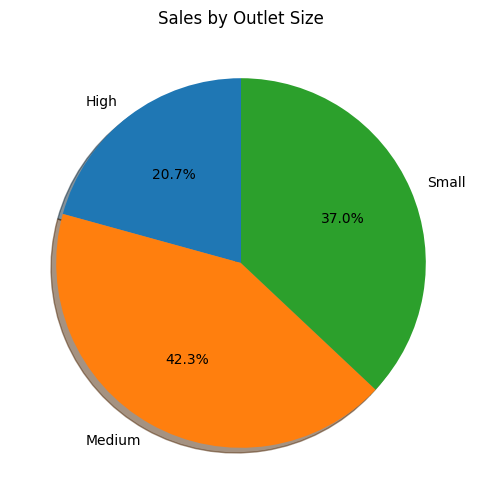

In [33]:
grouped = df.groupby(['Outlet Size'])['Sales'].sum()
plt.figure(figsize =(10,6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Sales by Outlet Size')
plt.show()

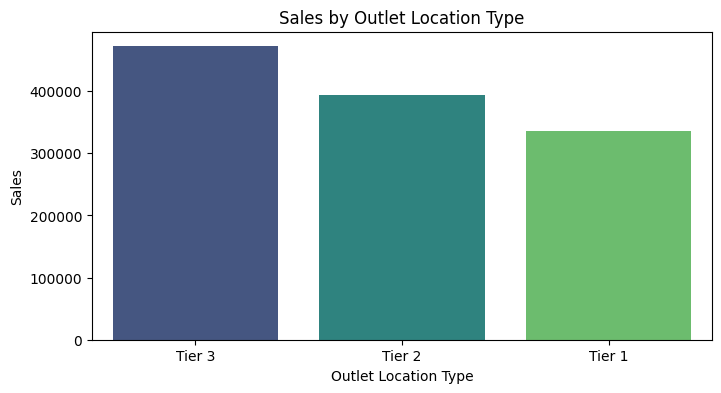

In [36]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=sales_by_location, x='Outlet Location Type', y='Sales', palette='viridis')
plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.show()